# Entropy and Gibbs free energy of mixing two gases

Here we investigate the change in the Gibbs free energy, $G$ and entropy, $S$ when mixing ideal gases for three cases as illustrated below.
This corresponds to KFKA05's compendium, exercise K15.1.

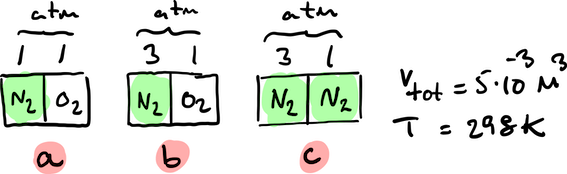

In [1]:
from math import log
from scipy.constants import R, N_A
T=298.15   # kelvin
V=5e-3     # m3
atm=101325 # Pa/atm
RT = R * T # thermal energy (J/mol)

## Case A

Here we can _e.g._ use the formula for ideal mixing (Dill and Bromberg, Eq. 15.4), which is valid for both ideal gases and liquid mixtures:

$$\Delta_{mix}S/nR = -x\ln{x}-(1-x)\ln{\left( 1-x\right ) }$$

where we have assumed that $\Delta_{mix}U=0$ whereby $\Delta_{mix}G = -T\Delta_{mix}S$.
We could of course also have used the approach taken in (B).

In [2]:
x = 0.5                            # mole fraction
nR = 1 * atm * V / T;              # nR = pV/T
dS = (-x*log(x)-(1-x)*log(1-x))*nR # Dill Eq. 15.4
dG = -T*dS                         # Mixing free energy
print(f"ΔS_mix = {dS:.3} J/K")
print(f"ΔG_mix = {dG:.4} J")

ΔS_mix = 1.18 J/K
ΔG_mix = -351.2 J


## Case B

The mixing equation used in (A) does not work here, as there is a pressure difference between the two compartments.
This is the same to say that the molar volumes of N₂ and O₂ differ, and this is not accounted for by Eq. 15.4 (Dill & Bromberg).
Instead use the more fundamental way of summing the free energy change using _chemical potentials_:

$$ \Delta G = G_{final} - G_{initial} = \sum_{i=1} \underbrace{n_i d\mu_i}_{dG_i}$$

For an ideal gas, $\mu_i = \mu_i^{\circ} + RT\ln{\left( p_i/p^{\circ} \right)}$ where $p_i = x_i p_{tot}$.
Here we see that that taking the difference, $d\mu_i$, all terms related to the reference state ($^{\circ}$) cancel out.
Remember that the chemical potential, $\mu_i$ measures the _free energy per particle_ (or mole) whereby multiplying with $n_i$, we get the
total free energy.

In [3]:
p1 = 3 * atm           # Pa
p2 = 1 * atm           # Pa
p = (p1 + p2) / 2      # Final pressure, Pa
n1 = p1 * 0.5 * V / RT # moles of N2
n2 = p2 * 0.5 * V / RT # moles of O2
x1 = n1 / (n1 + n2)    # N2 mole fraction
x2 = 1-x1              # O2 mole fraction
dG1 = n1 * RT * (log(x1*p) - log(p1))
dG2 = n2 * RT * (log(x2*p) - log(p2))
dG = dG1 + dG2         # Mixing free energy
print(f"ΔG_mix = {dG:.4} J")
print(f"ΔS_mix = {-dG/T:.3} J/K")

ΔG_mix = -702.3 J
ΔS_mix = 2.36 J/K


## Case C

This is solved in the same way as in (B), but the mole fraction, $x=1$.
The changes are much smaller than (B) since the available _volume per particle_, _i.e._ molar volume, changes less. It is interesting to note that even if we use a different isotope of N₂ we would recover the mixing behavior of (B).

In [4]:
dG1 = n1 * RT * (log(p) - log(p1))
dG2 = n2 * RT * (log(p) - log(p2))
dG = dG1 + dG2
print(f"ΔG_mix = {dG:.4} J")
print(f"ΔS_mix = {-dG/T:.3} J/K")

ΔG_mix = -132.5 J
ΔS_mix = 0.445 J/K
